<a href="https://colab.research.google.com/github/StanleyLiangYork/DeepLearningForMalaria/blob/master/MNIST_Classifications.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install tensorflow-gpu==1.15.0
!pip install numpy

In [4]:
import tensorflow as tf
print(tf.__version__)

1.15.0


In [0]:
# baseline cnn model for fashion mnist
from numpy import mean
from numpy import std
from matplotlib import pyplot as plt
from sklearn.model_selection import KFold
from tensorflow.keras.datasets import fashion_mnist
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.optimizers import Adam

Load the MNIST dataset from Keras

In [0]:
def load_dataset():
  (trainX, trainY), (testX, testY) = fashion_mnist.load_data()
  trainX = trainX.reshape((trainX.shape[0], 28, 28, 1))
  testX = testX.reshape((testX.shape[0], 28, 28, 1))
  trainY = to_categorical(trainY)
  testY = to_categorical(testY)
  return trainX, trainY, testX, testY

Rescale the pixels for network input

In [0]:
def prep_pixels(train, test):
  train_norm = train.astype('float32')
  test_norm = test.astype('float32')
  train_norm = train_norm / 255.0
  test_norm = test_norm / 255.0
  return train_norm, test_norm

Define a simple CNN architecture

In [0]:
def define_model():
  model = Sequential()
  model.add(Conv2D(64, (3,3), activation='relu', padding='same', input_shape=(28,28,1)))
  model.add(MaxPooling2D((2,2)))
  model.add(Conv2D(64, (3,3), activation='relu', padding='same'))
  model.add(MaxPooling2D((2,2)))
  model.add(Dropout(0.4))
  model.add(Flatten())
  model.add(Dense(128, activation='relu'))
  model.add(Dropout(0.4))
  model.add(Dense(10, activation='softmax'))
  model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])
  return model

Evaluate a model using k-fold cross validation

In [0]:
def evaluate_model(model, dataX, dataY, n_folds=5, epoch=10):
  scores = []
  histories = []
  # perform the k-fold partition
  kfold = KFold(n_folds, shuffle=True, random_state=1)
  # enumerate splits
  for train_ix, test_ix in kfold.split(dataX):
    train_X, train_Y, test_X, test_Y = trainX[train_ix], trainY[train_ix], trainX[test_ix],trainY[test_ix]
    history = model.fit(train_X, train_Y, epochs=10, batch_size=64, validation_data=(testX, testY), verbose=0)
    loss, acc = model.evaluate(testX, testY, verbose=0)
    print('loss: {:6.3f}, accuracy: {:6.3f}'.format(loss, acc*100.0))
    scores.append(acc)
    histories.append(history)
  return scores, histories

Plot diagnostic learning curves

In [0]:
def summarize_diagnostics(histories):
  for i in range(len(histories)):
    plt.figure(figsize=(12, 12))
    # plot loss
    plt.subplot(1, 2, 1)
    plt.plot(histories[i].history['loss'], color='blue', label='Training')
    plt.plot(histories[i].history['val_loss'], color='orange', label='Test')
    plt.legend(loc='lower right')
    plt.title('Cross Entropy Loss of fold {:d}'.format(i+1))
    # plot accuracy
    plt.subplot(1, 2, 2)
    plt.plot(histories[i].history['acc'], color='blue', label='Training')
    plt.plot(histories[i].history['val_acc'], color='orange', label='Test')
    plt.legend(loc='lower right')
    plt.title('Classification Accuracy of fold {:d}'.format(i+1))
    plt.show()


Summarize model performance

In [0]:
def summarize_performance(scores):
  print("Accuracy: mean={:6.3f} std={:6.3f}, n={:d}".format(mean(scores)*100, std(scores)*100,len(scores)))
  plt.boxplot(scores)
  plt.title('Model Accuracy')
  plt.show()

In [0]:
# load MNIST dataset
trainX, trainY, testX, testY = load_dataset()
# prepare pixel data
trainX, testX = prep_pixels(trainX, testX)


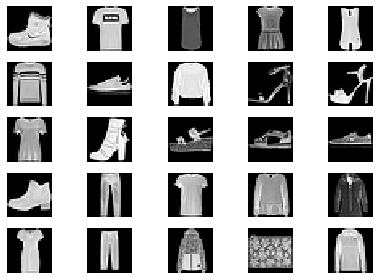

In [90]:
for i, image in enumerate(trainX[:25]):
  plt.subplot(5, 5, i+1)
  plt.imshow(image.reshape((28, 28)), cmap='gray')
  plt.axis('off')

plt.tight_layout()
plt.show()

In [99]:
model = define_model()
scores, histories = evaluate_model(model, trainX, trainY, epoch=12)

loss:  0.234, accuracy: 91.490
loss:  0.222, accuracy: 92.630
loss:  0.233, accuracy: 92.710
loss:  0.236, accuracy: 92.920
loss:  0.238, accuracy: 93.220


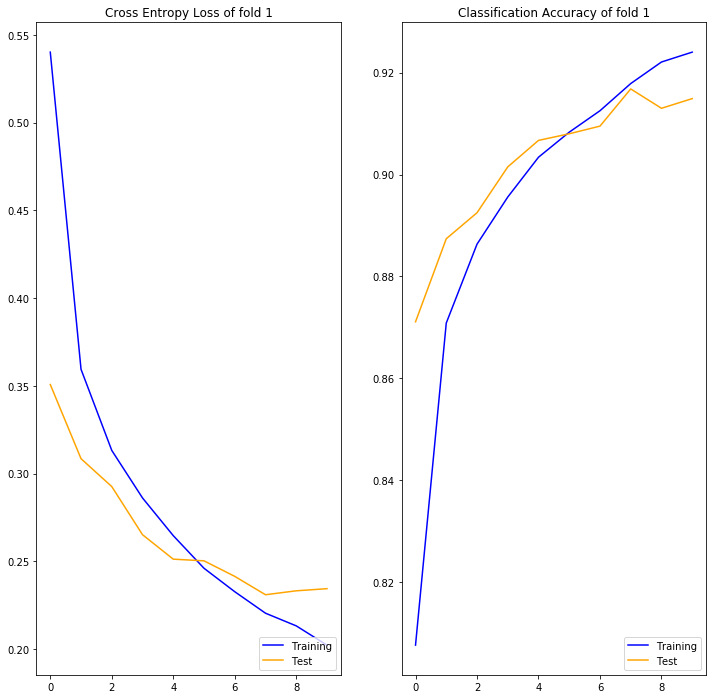

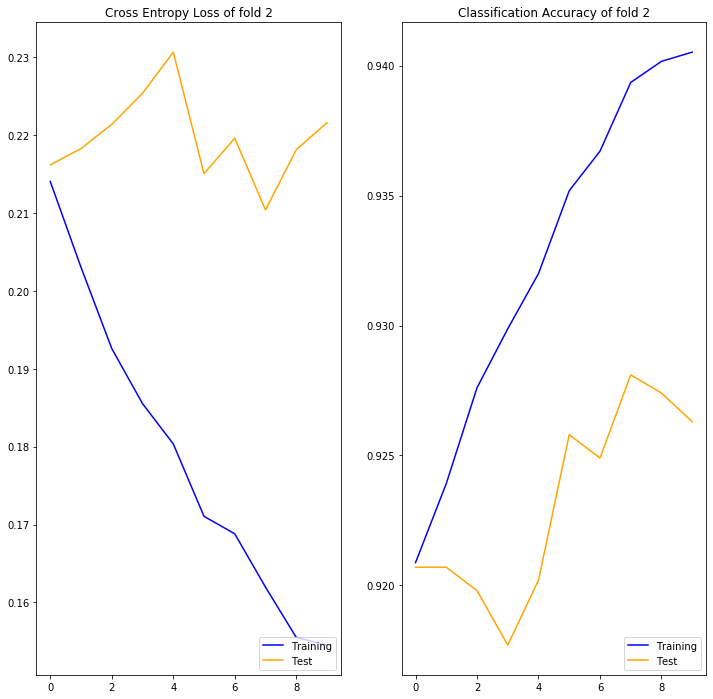

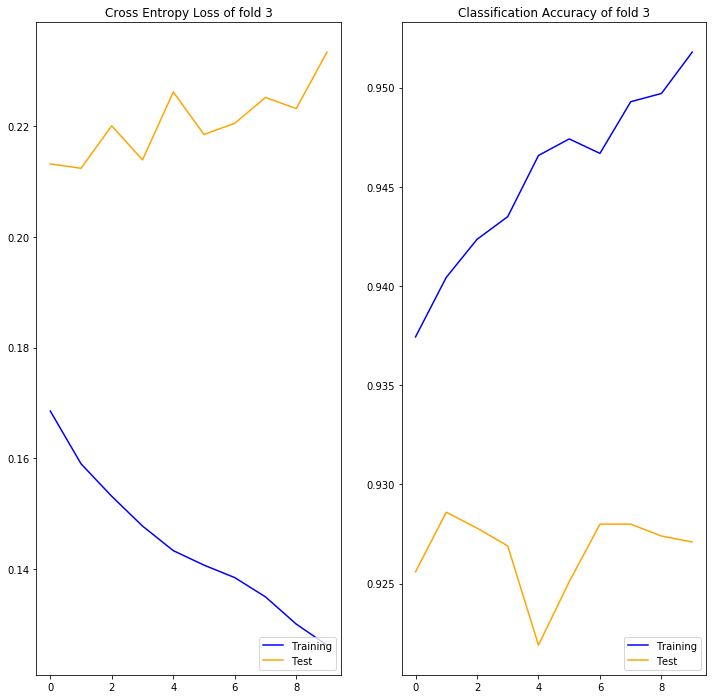

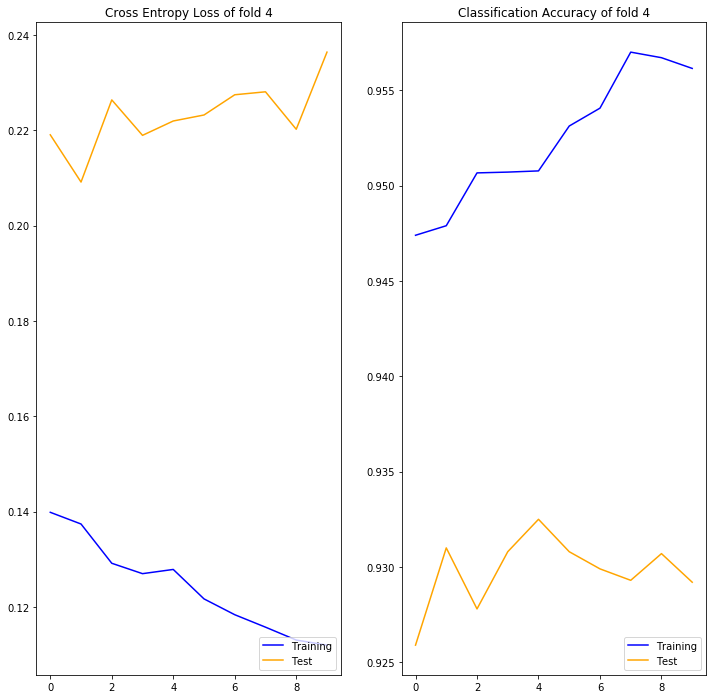

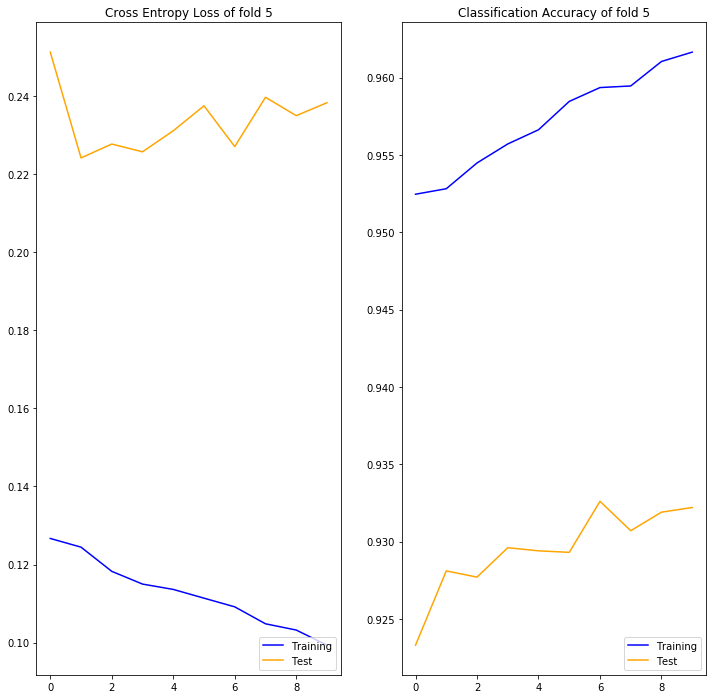

In [100]:
summarize_diagnostics(histories)

Accuracy: mean=92.594 std= 0.589, n=5


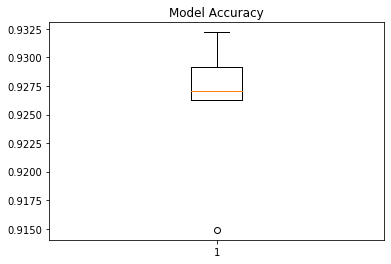

In [101]:
summarize_performance(scores)

In [102]:
model.fit(trainX, trainY, epochs=15, batch_size=256, verbose=1)
model.save('final_model.h5')

Epoch 1/15
60000/60000 [==============================] - 2s 37us/step - loss: 0.0908 - acc: 0.9665
Epoch 2/15
60000/60000 [==============================] - 2s 35us/step - loss: 0.0846 - acc: 0.9672
Epoch 3/15
60000/60000 [==============================] - 2s 35us/step - loss: 0.0819 - acc: 0.9694
Epoch 4/15
60000/60000 [==============================] - 2s 35us/step - loss: 0.0814 - acc: 0.9685
Epoch 5/15
60000/60000 [==============================] - 2s 35us/step - loss: 0.0776 - acc: 0.9698
Epoch 6/15
60000/60000 [==============================] - 2s 35us/step - loss: 0.0803 - acc: 0.9684
Epoch 7/15
60000/60000 [==============================] - 2s 35us/step - loss: 0.0777 - acc: 0.9696
Epoch 8/15
60000/60000 [==============================] - 2s 35us/step - loss: 0.0758 - acc: 0.9707
Epoch 9/15
60000/60000 [==============================] - 2s 35us/step - loss: 0.0759 - acc: 0.9711
Epoch 10/15
60000/60000 [==============================] - 2s 35us/step - loss: 0.0746 - acc: 0.9709

Evaluate the model on the test set

In [103]:
from keras.models import load_model
final_model = load_model('final_model.h5')

loss, acc = model.evaluate(testX, testY, verbose=0)
print("loss: {:6.2f}, accuracy: {:6.2f}".format(loss, acc*100))


loss:   0.24, accuracy:  93.41


Predict single image file

In [149]:
from keras.utils.data_utils import get_file
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
import numpy as np

!gsutil cp gs://pet-detect-239118/pullover.png ./testImg.png


Copying gs://pet-detect-239118/pullover.png...
/ [1 files][ 89.4 KiB/ 89.4 KiB]                                                
Operation completed over 1 objects/89.4 KiB.                                     


In [169]:
def load_single_image(filename):
  img = load_img(filename, color_mode = "grayscale", target_size=(28, 28))
  img = img_to_array(img)
  img = img.reshape(1, 28, 28, 1)
  img = img.astype('float32')
  img = img / 255.0
  return img


def predict_single_image(filename):
  CLASS_NAME = np.array(['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'])
  img = load_single_image('testImg.png')
  model = load_model('final_model.h5')
  result = model.predict_classes(img)
  label = CLASS_NAME[result[0]]
  print(label)
  
predict_single_image('testImg.png')


Pullover


Predict image batch

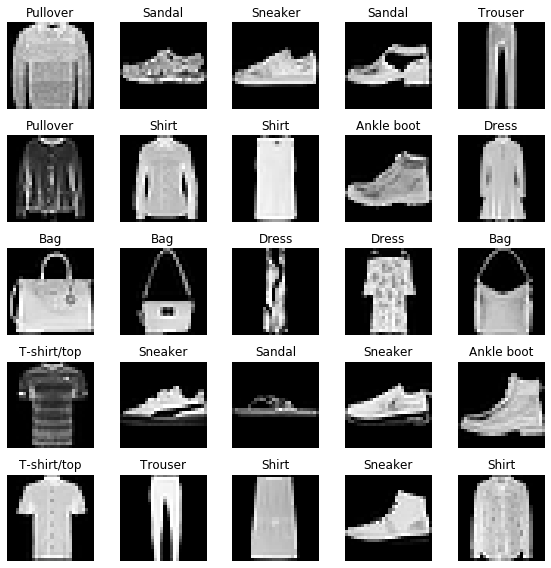

In [200]:
trainX, trainY, testX, testY = load_dataset()
CLASS_NAME = np.array(['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'])
imgs = testX[20:45]
imgXs = imgs.astype('float32')
imgXs = imgXs / 255.0
results = model.predict_classes(imgXs, batch_size=25)

plt.figure(figsize=(8, 8))
for i, image in enumerate(testX[20:45]):
  plt.subplot(5, 5, i+1)
  plt.imshow(image.reshape((28, 28)), cmap='gray')
  plt.title(CLASS_NAME[results[i]])
  plt.axis('off')


plt.tight_layout()
plt.show()

#plt.imshow(img.reshape((28, 28)), cmap='gray')
#plt.axis('off')
#plt.title(label)
#plt.show()